### **PROBLEM STATEMENT**

Belum memiliki strategi yang tepat untuk menawarkan jenis produk yang sesuai dengan segmen calon nasabah yang akan direkrut

### **TUJUAN PENELITIAN**

Membuat Sebuah Model Clustering untuk mengetahui kepemilikan produk berdasarkan demografi nasabah yang saat ini sudah menggunakan layanan FundFusion dengan Silhouette Score >0.7


### **VARIABEL YANG TERSEDIA**

Dari dataset yang dimiliki terdapat beberapa data yang tersedia:


---
**1. GCIF                     :** Unique Identifier Nasabah\
**2. Area                     :** Lokasi Nasabah (Jakarta,Bogor,Bandung,Surabaya,Jogja,Solo)\
**3. Jalur_Pembukaan          :** Touch Points Nasabah membuka produk --> Cabang, Telemarketing, Aplikasi Digital, Internet Banking\
**4. Vintage                  :** Durasi Menjadi Nasabah (Sejak membuka akun)\
**5. Usia                     :** Usia Nasabah\
**6. Jenis_Kelamin            :** Laki-laki (1) & Perempuan (0)\
**7. Status_Perkawinan        :** Belum Menikah (0), Menikah (1), Cerai (2), Janda/Duda (3)\
**8. Jumlah_Anak              :** Jumlah Anak Nasabah (numerik)\
**9. Pendidikan               :** Status Pendidikan Terakhir --> Tidak Memiliki Pendidikan Formal (0), SD (1), SMP (2), SMA (3), Sarjana (4), Magister (5), Doktor (6)\
**10. Produk_Tabungan         :** Status Kepemilikan Produk (Yes/1, No/0)\
**11. Produk_Deposito         :** Status Kepemilikan Produk (Yes/1, No/0)\
**12. Produk_Kartu_Kredit     :** Status Kepemilikan Produk (Yes/1, No/0)\
**13. Produk_Kredit_Rumah     :** Status Kepemilikan Produk (Yes/1, No/0)\
**14. Produk_Kredit_Kendaraan :** Status Kepemilikan Produk (Yes/1, No/0)\
**15. Produk_Kredit_Dana_Tunai:** Status Kepemilikan Produk (Yes/1, No/0)\
**16. Total_Kepemilikan_Produk:** Jumlah Produk Yang Dimiliki (Penjumlahan dari Produk2)\
**17. Pendapatan_Tahunan      :** Rata-rata Pendapatan Dalam Setahun\
**18. Total_Relationship_Balance :** Total Asset Nasabah dalam Cutoff Bulan Observasi





# **EXPERIMENT**

Point of View:
1. Dikelompokkan berdasarkan demografis untuk dicari pattern kepemilikan produk
2. Dikelompokkan berdasarkan kepemilikan produk untuk dicari patter berdasarkan demografisnya

# **IMPORT PACKAGE**

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [52]:
pd.set_option('display.max_columns', None)

# **Data untuk Clustering**

In [53]:
path_1 = "https://raw.githubusercontent.com/brainspopper/dataset/main/clustering_data.csv"
data = pd.read_csv(path_1)

In [54]:
data.dtypes

,0
GCIF,object
Area,object
Jalur_Pembukaan,object
Vintage,object
Usia,float64
Jenis_Kelamin,object
Status_Perkawinan,object
Jumlah_Anak,int64
Pendidikan,object
Produk_Tabungan,int64


# **Pemahaman Data**

In [55]:
# Menghitung Jumlah Nasabah di Setiap Area
data.groupby(('Area'))['Area'].count()

,Area
Area,
Bandung,6917
Bogor,1191
Jakarta,7017
Jogja,3001
Solo,5001
Surabaya,5002


Menghitung jumlah nasabah berdasarkan area (Lokasi)
- Menunjukkan bahwa Area Jakarta (7017) dan Bandung (6917) memiliki jumlah nasabah tertinggi
- Bogor (1191) dan Jogja (3001) memiliki jumlah nasabah sedikit
- Menunjukkan bahwa distribusi jumlah nasabah lebih berkonsentrasi di Kota besar, seperti Jakarta dan Bandung

In [56]:
# Mengambil data hanya kolom yang bertipe Numerik
numeric_cols = data.select_dtypes(include=['number']).columns

# Menghitung rata-rata untuk setiap kolom numerik dalam setiap area
result = data.groupby('Area')[numeric_cols].mean()
print(data.groupby('Area').mean(numeric_only=True).to_string())



               Usia  Jumlah_Anak  Produk_Tabungan  Produk_Deposito  Produk_Kartu_Kredit  Produk_Kredit_Rumah  Produk_Kredit_Kendaraan  Produk_Kredit_Dana_Tunai  Total_Kepemilikan_Produk  Pendapatan_Tahunan  Total_Relationship_Balance
Area                                                                                                                                                                                                                                     
Bandung   42.562310     1.296516         0.925401         0.599682             0.329767             0.587393                 0.163076                  0.537516                  3.142836          405.124910                2.454722e+08
Bogor     42.660451     1.366919         0.921075         0.596977             0.324097             0.582704                 0.160369                  0.554996                  3.140218          402.227540                2.499853e+08
Jakarta   42.696995     1.322930         0.925467         0.6035

In [57]:
# Menghitung Jumlah nasabah berdasarkan lama waktu nasabah menjadi pelanggan sejak pertama kali membuka akun
data.groupby(('Vintage'))['Vintage'].count()

,Vintage
Vintage,
2 - 3 Tahun,13953
< 1 Tahun,9278
> 4 Tahun,4898


Mayoritas nasabah (13.953) telah menjadi pelanggan selama 2 - 3 tahun, menunjukkan banyak nasabah tetap menggunakan layanan dalam periode ini

In [58]:
# Mengambil data hanya kolom yang bertipe Numerik
numeric_cols = data.select_dtypes(include=['number']).columns

# Menghitung rata-rata untuk setiap kolom numerik berdasarkan lama waktu nasabah menjadi pelanggan
result = data.groupby('Vintage')[numeric_cols].mean()
print(data.groupby('Vintage').mean(numeric_only=True).to_string())

                  Usia  Jumlah_Anak  Produk_Tabungan  Produk_Deposito  Produk_Kartu_Kredit  Produk_Kredit_Rumah  Produk_Kredit_Kendaraan  Produk_Kredit_Dana_Tunai  Total_Kepemilikan_Produk  Pendapatan_Tahunan  Total_Relationship_Balance
Vintage                                                                                                                                                                                                                                     
2 - 3 Tahun  42.578850     1.291694         0.927256         0.607755             0.328531             0.589336                 0.163764                  0.539311                  3.155952          407.679639                2.489367e+08
< 1 Tahun    42.689341     1.294676         0.931235         0.592585             0.336495             0.594201                 0.164798                  0.523389                  3.142703          395.611231                2.486679e+08
> 4 Tahun    42.571866     1.338301         0.912822

In [59]:
# Menghitung jumlah nasabah berdasarkan jalur pembukaan akun pelanggan
data.groupby(('Jalur_Pembukaan'))['Jalur_Pembukaan'].count()

,Jalur_Pembukaan
Jalur_Pembukaan,
Aplikasi Digital,6216
Cabang,5856
Internet Banking,5795
Telemarketing,10262


- Sebagian besar nasabah melakukan pembukaan akun melalui telemarketing, yaitu melalui panggilan telpon yang dilakukan oleh tim marketing kepada pelanggan/nasabah.
- Jalur pembukaan melalui Internet Banking (5795), adalah jalur pembukaan yang jumlahnya paling sedikit. Hal ini dimungkinkan karena kurangnya promosi atau kemudahan akses, selain itu kemungkinan disebabkan karena proses pembukaan akun di Internet Banking mungkin masig kurang User-Friendly

In [60]:
# Mengambil data hanya kolom yang bertipe numerik saja
numeric_cols = data.select_dtypes(include=['number']).columns

# Menghitung rata-rata untuk setiap kolom numerik berdasarkan jalur pembukaan akun
result = data.groupby('Jalur_Pembukaan')[numeric_cols].mean()
print(data.groupby('Jalur_Pembukaan').mean(numeric_only=True).to_string())

                       Usia  Jumlah_Anak  Produk_Tabungan  Produk_Deposito  Produk_Kartu_Kredit  Produk_Kredit_Rumah  Produk_Kredit_Kendaraan  Produk_Kredit_Dana_Tunai  Total_Kepemilikan_Produk  Pendapatan_Tahunan  Total_Relationship_Balance
Jalur_Pembukaan                                                                                                                                                                                                                                  
Aplikasi Digital  42.442089     1.292149         0.930180         0.598456             0.323681             0.593147                 0.165541                  0.535714                  3.146718          405.278314                2.489950e+08
Cabang            42.560627     1.308743         0.924180         0.610143             0.325478             0.583675                 0.153518                  0.544740                  3.141735          409.923156                2.456661e+08
Internet Banking  42.723992     

In [61]:
# Menghitung jumlah nasabah berdasarkan Status Perkawinan
data.groupby(('Status_Perkawinan'))['Status_Perkawinan'].count()

,Status_Perkawinan
Status_Perkawinan,
Belum Menikah,8168
Cerai,4077
Janda/Duda,4045
Menikah,11839


- Mayoritas nasabah berstatus menikah (11.839). Bisa jadi karena pasangan menikah lebih cenderung memiliki kebutuhan finansial yang lebih kompleks, seperti kredit rumah, investasi, atau tabungan bersama

In [62]:
# Mengambil data pada kolom yang bertipe numerik
numeric_cols = data.select_dtypes(include=['number']).columns

# Menghitung rata-rata untuk setiap kolom berdasarkan status perkawinan
result = data.groupby('Status_Perkawinan')[numeric_cols].mean()
print(data.groupby('Status_Perkawinan').mean(numeric_only=True).to_string())

                        Usia  Jumlah_Anak  Produk_Tabungan  Produk_Deposito  Produk_Kartu_Kredit  Produk_Kredit_Rumah  Produk_Kredit_Kendaraan  Produk_Kredit_Dana_Tunai  Total_Kepemilikan_Produk  Pendapatan_Tahunan  Total_Relationship_Balance
Status_Perkawinan                                                                                                                                                                                                                                 
Belum Menikah      39.571621     0.000000         1.000000         0.596107             0.333374             0.331660                 0.160749                  0.499633                  2.921523          420.636141                2.423448e+08
Cerai              50.226883     2.003679         1.000000         0.607555             0.337258             0.509688                 0.172676                  0.389747                  3.016924          426.269070                2.393499e+08
Janda/Duda               NaN

# **Persiapan Data**

## Pengecekan Data Duplikat dan *Missing Data*

In [63]:
# Menghitung data kosong di setiap kolom
data.isnull().sum()

,0
GCIF,0
Area,0
Jalur_Pembukaan,0
Vintage,0
Usia,4045
Jenis_Kelamin,0
Status_Perkawinan,0
Jumlah_Anak,0
Pendidikan,0
Produk_Tabungan,0


In [64]:
# Menghilangkan data kosong
data = data.dropna()

In [65]:
data.isnull().sum()

,0
GCIF,0
Area,0
Jalur_Pembukaan,0
Vintage,0
Usia,0
Jenis_Kelamin,0
Status_Perkawinan,0
Jumlah_Anak,0
Pendidikan,0
Produk_Tabungan,0


In [66]:
# Menghitung data duplikat
data.duplicated().sum()

np.int64(0)

## Pengecekan Data Outlier

In [67]:
# Menghitung jumlah data di setiap kolom
data.count()

,0
GCIF,24084
Area,24084
Jalur_Pembukaan,24084
Vintage,24084
Usia,24084
Jenis_Kelamin,24084
Status_Perkawinan,24084
Jumlah_Anak,24084
Pendidikan,24084
Produk_Tabungan,24084


In [68]:
# Mendeteksi dan mengatasi outliers (contoh dengan Z-Score)
# Library berisi berbagai fungsi statistik
from scipy import stats
z_scores = stats.zscore(data[['Usia', 'Pendapatan_Tahunan', 'Total_Relationship_Balance']])
data = data[(z_scores < 3).all(axis=1)]  # Menghapus data dengan Z-Score lebih dari 3

- Z-Score adalah nilai yang menunjukkan seberapa jauh data menyimpang dari rata-rata dalam satuan standar deviasi.
- axis=1 -> Berarti dilakukan pengecekan per baris (bukan per kolom)
- Jika ada salah satu kolom dalam baris tersebut memiliki Z-Score >= 3, maka baris itu akan dihapus

In [69]:
#Menghitung data kembali
data.count()

,0
GCIF,23704
Area,23704
Jalur_Pembukaan,23704
Vintage,23704
Usia,23704
Jenis_Kelamin,23704
Status_Perkawinan,23704
Jumlah_Anak,23704
Pendidikan,23704
Produk_Tabungan,23704


## Menyaring Data Jalur Pembukaan Melalui Telemarketing

In [70]:
# Memilih Data Jalur Pembukaan melalui Telemarketing
data0 = data[data['Jalur_Pembukaan']=='Telemarketing']

In [71]:
data0

,GCIF,Area,Jalur_Pembukaan,Vintage,Usia,Jenis_Kelamin,Status_Perkawinan,Jumlah_Anak,Pendidikan,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
1,G18528,Jakarta,Telemarketing,< 1 Tahun,23.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,198,10668586
2,G22419,Surabaya,Telemarketing,< 1 Tahun,30.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,280,299076075
7,G13193,Solo,Telemarketing,< 1 Tahun,29.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,295,76653088
8,G09296,Jakarta,Telemarketing,< 1 Tahun,49.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,443,247157199
9,G09228,Jakarta,Telemarketing,< 1 Tahun,21.0,Perempuan,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,257,27585562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28089,G19583,Bandung,Telemarketing,2 - 3 Tahun,54.0,Laki-laki,Menikah,0,Tidak Sekolah Formal,1,1,1,1,0,1,5,489,321693904
28090,G18081,Jakarta,Telemarketing,2 - 3 Tahun,58.0,Laki-laki,Belum Menikah,0,Tidak Sekolah Formal,1,1,1,1,1,0,5,658,224477967
28092,G18530,Bandung,Telemarketing,2 - 3 Tahun,42.0,Laki-laki,Cerai,3,Tidak Sekolah Formal,1,1,1,1,0,1,5,585,411871605
28095,G03782,Jogja,Telemarketing,2 - 3 Tahun,44.0,Laki-laki,Cerai,1,Tidak Sekolah Formal,1,1,0,1,1,1,5,279,161744694


In [72]:
# Menghapus kolom GCIF dan kolom Jalur_Pembukaan
data0 = data0.drop(columns=['GCIF','Jalur_Pembukaan']).reset_index(drop=True)

In [73]:
# Membuat ulang indeks agar dimulau dari 0, 1, 2, ... secara berurutan
data0 = data0.reset_index()

In [74]:
data0

,index,Area,Vintage,Usia,Jenis_Kelamin,Status_Perkawinan,Jumlah_Anak,Pendidikan,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
0,0,Jakarta,< 1 Tahun,23.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,198,10668586
1,1,Surabaya,< 1 Tahun,30.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,280,299076075
2,2,Solo,< 1 Tahun,29.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,295,76653088
3,3,Jakarta,< 1 Tahun,49.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,443,247157199
4,4,Jakarta,< 1 Tahun,21.0,Perempuan,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,257,27585562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8648,8648,Bandung,2 - 3 Tahun,54.0,Laki-laki,Menikah,0,Tidak Sekolah Formal,1,1,1,1,0,1,5,489,321693904
8649,8649,Jakarta,2 - 3 Tahun,58.0,Laki-laki,Belum Menikah,0,Tidak Sekolah Formal,1,1,1,1,1,0,5,658,224477967
8650,8650,Bandung,2 - 3 Tahun,42.0,Laki-laki,Cerai,3,Tidak Sekolah Formal,1,1,1,1,0,1,5,585,411871605
8651,8651,Jogja,2 - 3 Tahun,44.0,Laki-laki,Cerai,1,Tidak Sekolah Formal,1,1,0,1,1,1,5,279,161744694


## Pembagian Dataset Experiment
1. Experiment 0 --> Semua Variabel Digunakan
2. Experiment 1 --> Menggunakan Demographics
3. Experiment 2 --> Menggunakan Financial Related Variable

In [75]:
# Mengambil data dari semua baris dan dari index ke-1 sampai index ke-7
data1 = data0.iloc[:,1:8]

In [76]:
data1

,Area,Vintage,Usia,Jenis_Kelamin,Status_Perkawinan,Jumlah_Anak,Pendidikan
0,Jakarta,< 1 Tahun,23.0,Laki-laki,Belum Menikah,0,Doktor
1,Surabaya,< 1 Tahun,30.0,Laki-laki,Belum Menikah,0,Doktor
2,Solo,< 1 Tahun,29.0,Laki-laki,Belum Menikah,0,Doktor
3,Jakarta,< 1 Tahun,49.0,Laki-laki,Belum Menikah,0,Doktor
4,Jakarta,< 1 Tahun,21.0,Perempuan,Belum Menikah,0,Doktor
...,...,...,...,...,...,...,...
8648,Bandung,2 - 3 Tahun,54.0,Laki-laki,Menikah,0,Tidak Sekolah Formal
8649,Jakarta,2 - 3 Tahun,58.0,Laki-laki,Belum Menikah,0,Tidak Sekolah Formal
8650,Bandung,2 - 3 Tahun,42.0,Laki-laki,Cerai,3,Tidak Sekolah Formal
8651,Jogja,2 - 3 Tahun,44.0,Laki-laki,Cerai,1,Tidak Sekolah Formal


In [77]:
# Mengambil semua baris data dari index ke-8 sampai index ke-16
data2 = data0.iloc[:,8:17]

In [78]:
data2

,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
0,1,0,0,0,0,0,1,198,10668586
1,1,0,0,0,0,0,1,280,299076075
2,1,0,0,0,0,0,1,295,76653088
3,1,0,0,0,0,0,1,443,247157199
4,1,0,0,0,0,0,1,257,27585562
...,...,...,...,...,...,...,...,...,...
8648,1,1,1,1,0,1,5,489,321693904
8649,1,1,1,1,1,0,5,658,224477967
8650,1,1,1,1,0,1,5,585,411871605
8651,1,1,0,1,1,1,5,279,161744694


## Melakukan Encoding untuk Data Category

In [79]:
data1 = pd.get_dummies(data1, columns=['Area','Jenis_Kelamin', 'Status_Perkawinan', 'Pendidikan','Vintage'])

- pd.get_dummies() = akan mengubah setiap kategori dalam kolom menjadi kolom baru yang berisi nilai 0 atau 1.

In [80]:
data1

,Usia,Jumlah_Anak,Area_Bandung,Area_Bogor,Area_Jakarta,Area_Jogja,Area_Solo,Area_Surabaya,Jenis_Kelamin_Laki-laki,Jenis_Kelamin_Perempuan,Status_Perkawinan_Belum Menikah,Status_Perkawinan_Cerai,Status_Perkawinan_Menikah,Pendidikan_Doktor,Pendidikan_Magister,Pendidikan_SD,Pendidikan_SMA,Pendidikan_SMP,Pendidikan_Sarjana,Pendidikan_Tidak Sekolah Formal,Vintage_2 - 3 Tahun,Vintage_< 1 Tahun,Vintage_> 4 Tahun
0,23.0,0,False,False,True,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,True,False
1,30.0,0,False,False,False,False,False,True,True,False,True,False,False,True,False,False,False,False,False,False,False,True,False
2,29.0,0,False,False,False,False,True,False,True,False,True,False,False,True,False,False,False,False,False,False,False,True,False
3,49.0,0,False,False,True,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,True,False
4,21.0,0,False,False,True,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8648,54.0,0,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,True,False,False
8649,58.0,0,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,True,False,False
8650,42.0,3,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,True,False,False
8651,44.0,1,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,True,True,False,False


## Standardisasi Data Numerik

Dilakukan standardisasi digunakan untuk menyamakan skala dari berbagai fitur numberik sehingga tidak ada fitur yang mendominasi dalam analisis atau model machine learning.

In [81]:
# Mengambil semua kolom data dari data "data2" dan menyimpannya
# kembali dalam variabel predname_num
predname_num = data2.columns
predname_num

Index(['Produk_Tabungan', 'Produk_Deposito', 'Produk_Kartu_Kredit',
       'Produk_Kredit_Rumah', 'Produk_Kredit_Kendaraan',
       'Produk_Kredit_Dana_Tunai', 'Total_Kepemilikan_Produk',
       'Pendapatan_Tahunan', 'Total_Relationship_Balance'],
      dtype='object')

In [82]:
from sklearn.preprocessing import StandardScaler
pt = StandardScaler()
X_num = pd.DataFrame(pt.fit_transform(data2))
X_num.head()

,0,1,2,3,4,5,6,7,8
0,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-1.256170,-1.607805
1,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.800973,0.410538
2,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.717705,-1.146030
3,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,0.103871,0.047197
4,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.928650,-1.489416


- fit() menghitung mean dan standar deviasi dari setiap fitur dalam data2
- transform() mengubah setiap nilai dalam data2 menjadi nilai yang sudah distandarisasi

In [83]:
X_num.columns = predname_num
X_num.head()

,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
0,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-1.256170,-1.607805
1,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.800973,0.410538
2,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.717705,-1.146030
3,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,0.103871,0.047197
4,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.928650,-1.489416


- Mengubah nama kolom pada dataframe X_num agar sesuai dengan nama kolom asli sebelum distandarisasi
- predname_num adalah variabel yang berisi nama kolom dari data2 sebelum dilakukan standarisasi

## Pengecekan Korelasi

In [84]:
corrtest1 = data1.corr().abs()
corrtest2 = X_num.corr().abs()

- data1.corr() menghitung matriks korelasi antara setiap kolom dalam data1
- .abs() mengambil nilai absolut, sehingga semua korelasi negatif menjadi positif
- X_num.corr() menghitung korelasi antara kolom dalam X_num (data setelah distandardisasi)

In [85]:
# Membuang Nilai Redundan Pada Matriks
upper = corrtest1.where(np.triu(np.ones(corrtest1.shape), k=1).astype(bool))
upper1 = corrtest2.where(np.triu(np.ones(corrtest2.shape), k=1).astype(bool))

# Mencari Nilai Yang Berkorelasi di atas 0.7
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]
to_drop1 = [column for column in upper1.columns if any(upper1[column] > 0.7)]

# Menghapus Kolom Yang Berkorelasi di atas 0.7
data1 = data1.drop(to_drop, axis=1)
data2 = data2.drop(to_drop1, axis=1)

In [86]:
corrtest1

,Usia,Jumlah_Anak,Area_Bandung,Area_Bogor,Area_Jakarta,Area_Jogja,Area_Solo,Area_Surabaya,Jenis_Kelamin_Laki-laki,Jenis_Kelamin_Perempuan,Status_Perkawinan_Belum Menikah,Status_Perkawinan_Cerai,Status_Perkawinan_Menikah,Pendidikan_Doktor,Pendidikan_Magister,Pendidikan_SD,Pendidikan_SMA,Pendidikan_SMP,Pendidikan_Sarjana,Pendidikan_Tidak Sekolah Formal,Vintage_2 - 3 Tahun,Vintage_< 1 Tahun,Vintage_> 4 Tahun
Usia,1.000000,0.105752,0.015472,0.010122,0.000703,0.004196,0.009153,0.000800,0.022998,0.022998,0.182525,0.269976,0.027666,0.019497,0.002532,0.017649,0.007478,0.000769,0.009315,0.023562,0.009375,0.014677,0.005059
Jumlah_Anak,0.105752,1.000000,0.004419,0.008073,0.006375,0.003399,0.000538,0.020592,0.004123,0.004123,0.637109,0.210638,0.448296,0.010529,0.012402,0.002656,0.005471,0.004266,0.001571,0.012021,0.012883,0.000549,0.015414
Area_Bandung,0.015472,0.004419,1.000000,0.075688,0.434134,0.129781,0.165969,0.173396,0.005038,0.005038,0.001969,0.004996,0.001850,0.004182,0.018846,0.009738,0.008150,0.008533,0.002294,0.003398,0.004687,0.007997,0.003280
Area_Bogor,0.010122,0.008073,0.075688,1.000000,0.160824,0.048077,0.061483,0.064234,0.017781,0.017781,0.017977,0.007205,0.011709,0.014371,0.018786,0.005275,0.019397,0.005195,0.001137,0.011784,0.006728,0.011535,0.004774
Area_Jakarta,0.000703,0.006375,0.434134,0.160824,1.000000,0.275762,0.352656,0.368437,0.016156,0.016156,0.003612,0.000622,0.002968,0.006520,0.004666,0.005406,0.001637,0.021187,0.003183,0.004680,0.000667,0.002865,0.002436
Area_Jogja,0.004196,0.003399,0.129781,0.048077,0.275762,1.000000,0.105423,0.110141,0.000914,0.000914,0.004833,0.011100,0.003675,0.001621,0.012903,0.014696,0.005862,0.002432,0.017757,0.003543,0.001066,0.001924,0.000867
Area_Solo,0.009153,0.000538,0.165969,0.061483,0.352656,0.105423,1.000000,0.140853,0.001620,0.001620,0.018026,0.001115,0.016291,0.012661,0.008184,0.002844,0.000952,0.013671,0.004444,0.016788,0.023666,0.008069,0.020266
Area_Surabaya,0.000800,0.020592,0.173396,0.064234,0.368437,0.110141,0.140853,1.000000,0.010665,0.010665,0.026844,0.018072,0.012041,0.006102,0.019120,0.014693,0.010579,0.004389,0.011413,0.008367,0.024732,0.008411,0.021204
Jenis_Kelamin_Laki-laki,0.022998,0.004123,0.005038,0.017781,0.016156,0.000914,0.001620,0.010665,1.000000,1.000000,0.008398,0.014166,0.018525,0.011471,0.003639,0.010552,0.001215,0.017649,0.010154,0.002050,0.000872,0.006728,0.006585
Jenis_Kelamin_Perempuan,0.022998,0.004123,0.005038,0.017781,0.016156,0.000914,0.001620,0.010665,1.000000,1.000000,0.008398,0.014166,0.018525,0.011471,0.003639,0.010552,0.001215,0.017649,0.010154,0.002050,0.000872,0.006728,0.006585


In [87]:
data1

,Usia,Jumlah_Anak,Area_Bandung,Area_Bogor,Area_Jakarta,Area_Jogja,Area_Solo,Area_Surabaya,Jenis_Kelamin_Laki-laki,Status_Perkawinan_Belum Menikah,Status_Perkawinan_Cerai,Pendidikan_Doktor,Pendidikan_Magister,Pendidikan_SD,Pendidikan_SMA,Pendidikan_SMP,Pendidikan_Sarjana,Pendidikan_Tidak Sekolah Formal,Vintage_2 - 3 Tahun,Vintage_< 1 Tahun,Vintage_> 4 Tahun
0,23.0,0,False,False,True,False,False,False,True,True,False,True,False,False,False,False,False,False,False,True,False
1,30.0,0,False,False,False,False,False,True,True,True,False,True,False,False,False,False,False,False,False,True,False
2,29.0,0,False,False,False,False,True,False,True,True,False,True,False,False,False,False,False,False,False,True,False
3,49.0,0,False,False,True,False,False,False,True,True,False,True,False,False,False,False,False,False,False,True,False
4,21.0,0,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8648,54.0,0,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True,False,False
8649,58.0,0,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,True,True,False,False
8650,42.0,3,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,True,False,False
8651,44.0,1,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,True,True,False,False


In [88]:
X_num

,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
0,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-1.256170,-1.607805
1,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.800973,0.410538
2,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.717705,-1.146030
3,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,0.103871,0.047197
4,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.928650,-1.489416
...,...,...,...,...,...,...,...,...,...
8648,0.315645,0.819409,1.437451,0.844468,-0.436158,0.891338,1.797748,0.359225,0.568823
8649,0.315645,0.819409,1.437451,0.844468,2.292747,-1.121909,1.797748,1.297376,-0.111517
8650,0.315645,0.819409,1.437451,0.844468,-0.436158,0.891338,1.797748,0.892139,1.199907
8651,0.315645,0.819409,-0.695676,0.844468,2.292747,0.891338,1.797748,-0.806524,-0.550539


Gabungan Keduanya

In [89]:
data_combined = pd.concat([data1, X_num], axis=1, join='inner')
data_combined

,Usia,Jumlah_Anak,Area_Bandung,Area_Bogor,Area_Jakarta,Area_Jogja,Area_Solo,Area_Surabaya,Jenis_Kelamin_Laki-laki,Status_Perkawinan_Belum Menikah,Status_Perkawinan_Cerai,Pendidikan_Doktor,Pendidikan_Magister,Pendidikan_SD,Pendidikan_SMA,Pendidikan_SMP,Pendidikan_Sarjana,Pendidikan_Tidak Sekolah Formal,Vintage_2 - 3 Tahun,Vintage_< 1 Tahun,Vintage_> 4 Tahun,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
0,23.0,0,False,False,True,False,False,False,True,True,False,True,False,False,False,False,False,False,False,True,False,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-1.256170,-1.607805
1,30.0,0,False,False,False,False,False,True,True,True,False,True,False,False,False,False,False,False,False,True,False,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.800973,0.410538
2,29.0,0,False,False,False,False,True,False,True,True,False,True,False,False,False,False,False,False,False,True,False,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.717705,-1.146030
3,49.0,0,False,False,True,False,False,False,True,True,False,True,False,False,False,False,False,False,False,True,False,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,0.103871,0.047197
4,21.0,0,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.928650,-1.489416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8648,54.0,0,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True,False,False,0.315645,0.819409,1.437451,0.844468,-0.436158,0.891338,1.797748,0.359225,0.568823
8649,58.0,0,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,True,True,False,False,0.315645,0.819409,1.437451,0.844468,2.292747,-1.121909,1.797748,1.297376,-0.111517
8650,42.0,3,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,True,False,False,0.315645,0.819409,1.437451,0.844468,-0.436158,0.891338,1.797748,0.892139,1.199907
8651,44.0,1,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,True,True,False,False,0.315645,0.819409,-0.695676,0.844468,2.292747,0.891338,1.797748,-0.806524,-0.550539


# **Modeling & Evaluation**

Pembangunan model akan menggunakan 2 algoritma:
1. K-Means
2. K-Medoid

dengan pengecekan silhouette score


## K-Means

In [90]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

###Experiment 0 - Semua Variabel Digunakan

In [91]:
# Variasi hyperparameter (jumlah cluster)
for n_clusters in range(3, 6):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0) # Membuat model K-Means clustering dengan jumlah n cluster
    cluster_labels = kmeans.fit_predict(data_combined)
    silhouette_avg = silhouette_score(data_combined, cluster_labels) #Menghitung Silhotter Score
    print(f"Silhouette Score (K-Means) -"+str(n_clusters)+" : "+str(silhouette_avg))
    data0['Clustering_KMeans_Exp0_'+str(n_clusters)] = cluster_labels



Silhouette Score (K-Means) -3 : 0.43731081737346444
Silhouette Score (K-Means) -4 : 0.37992431452339676
Silhouette Score (K-Means) -5 : 0.3231396807582395


- Kita tidak tahu jumlah cluster (k) yang optimal, sehingga kita mencoba berbagai nilai k dalam range(3,6) yaitu k=3,4, dan 5
- fit.predict(data_combined) = Melatih model K-Means pada dataset data_combined
- Silhouette Score, yaitu metrik evaluasi clustering.
- Silhouette Score mengukur seberapa baik titik-titik dalam suatu cluster saling berdekatan, dibandingkan dengan titik-titik cluster lain
- Semakin tinggi nilainya (maksimum = 1), semakin baik cluster yang dibentuk

- Cluster dengan jumlah 3 memiliki performa terbaik, karena Silhouette Score tertinggi (0.4314)
- Semakin banyak jumlah cluster, nilai Silhoutte menurun yang menunjukkan bahwa pembagian cluster semakin kurang optimal.
- Jumlah cluster terbaik berdasarkan Silhouette adalah **3 Cluster**

###Experiment 1 - Menggunakan Data Berdasarkan Demografis/Wilayah

In [92]:
for n_clusters in range(3, 6):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(data1)
    silhouette_avg = silhouette_score(data1, cluster_labels)
    print(f"Silhouette Score (K-Means) -"+str(n_clusters)+" : "+str(silhouette_avg))
    data0['Clustering_KMeans_Exp1_'+str(n_clusters)] = cluster_labels


Silhouette Score (K-Means) -3 : 0.5021981273872203
Silhouette Score (K-Means) -4 : 0.48877557780538605
Silhouette Score (K-Means) -5 : 0.4210233962025565


- Jumlah cluster terbaik berdasarkan Silhouette adalah **3 Cluster**
- Semakin banyak jumlah cluster, nilai Silhouette menurun yang menunjukkan bahwa pembagian cluster semakin kurang optimal

###Experiment 2 - Menggunakan Financial Related Variable

In [93]:
for n_clusters in range(3, 6):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(X_num)
    silhouette_avg = silhouette_score(X_num, cluster_labels)
    print(f"Silhouette Score (K-Means) -"+str(n_clusters)+" : "+str(silhouette_avg))
    data0['Clustering_KMeans_Exp2_'+str(n_clusters)] = cluster_labels


Silhouette Score (K-Means) -3 : 0.17568395122545125
Silhouette Score (K-Means) -4 : 0.17500826370194086
Silhouette Score (K-Means) -5 : 0.18806929666647304


- Skor ini cukup rendah, yang berarti clustering tidak begitu baik
- Biasanya Silhouette Score yang baik berada di atas 0.5 dan yang sangat bagus mendekati 1
- Dari K=3 hingga 5, skor tetap rendah dan tidak menunjukkan pola perbaikan yang jelas
- Menunjukkan bahwa data mungkin tidak memiliki pemisah cluster yang kuat atau fitur yang digunakan kuran relevan untuk clustering

# Analisa Hasil

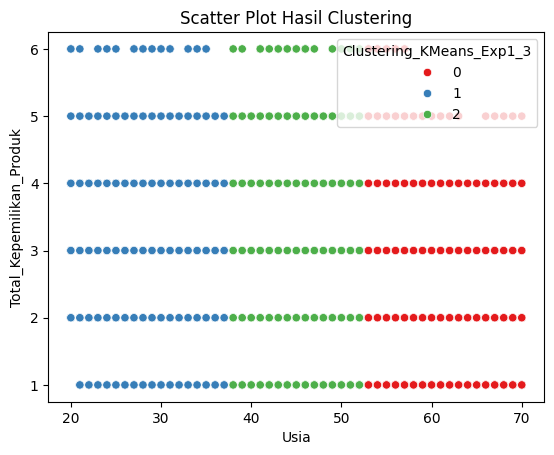

In [94]:
# Memvisualisasikan hasil clustering dalam bentuk scatter plot menggunakan
# Seabord (sns) dan Matplotlib (plt)
sns.scatterplot(data=data0, x='Usia', y='Total_Kepemilikan_Produk', hue='Clustering_KMeans_Exp1_3', palette='Set1')
plt.title('Scatter Plot Hasil Clustering')
plt.show()

- Menggunakan dataset 'data0', dan menambahkannya ke variabel 'data'.
- Sumbu X adalah variabel 'Usia'
- Sumbu y adalah variabel 'Total Kepemilikan Produk'
- hue = 'Clustering_KMeans_Exp1_3 adalah Warna titik ditentukan oleh hasil clustering
- Pallette = 'Set1' menggunakan palet warna Set1 untuk membedakan klaster

PENJELASAN SCATTER PLOT
- Merah (Cluster 0) = Cenderung berada di usia yang lebih tua (50+ tahun) dan memiliki variasi jumlah kepemilikan produk.
- Biru (Cluster 1) = Tersebar di berbagai usia, tetapi lebih banyak dikelompokkan usia muda dna memiliki jumlah produk yang bervariasi
- Hijau (Cluster 2) = Terlihat mendominasi usia 30 - 50 tahun, dengan variasi jumlah kepemilikan produk
- K-Means berhasil mengelompokkan nasabah berdasarkan Usia dan Kepemilikan Produk
- Ada perbedaan yang cukup jelas antara masing-masing klaster, meskipun ada beberapa titik yang berdekatan.
- Klaster ini bisa digunakan untuk analisis lebih lanjut, misalnya untuk strategi pemasaran atau rekomendasi produk

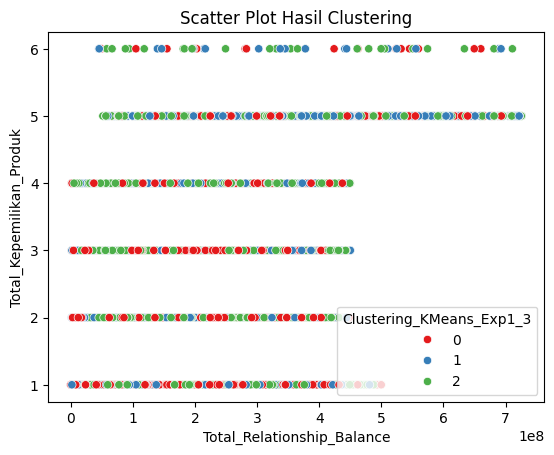

In [95]:
# Memvisualisasikan hasil clustering dalam bentuk scatter plot menggunakan
# Seabord (sns) dan Matplotlib (plt)
sns.scatterplot(data=data0, x='Total_Relationship_Balance', y='Total_Kepemilikan_Produk', hue='Clustering_KMeans_Exp1_3', palette='Set1')
plt.title('Scatter Plot Hasil Clustering')
plt.show()

- Data tampak tersusun berjenjang pada sumbu Y karena jumlah kepemilikan produk adalah variabel kategori (diskrit).
- Total Relationship Balance memiliki rentang yang besar, dari 0 hingga sekitar 700 juta.
- Warna merah (0), biru (1), dan hijau (2) menunjukkan bahwa nasabah telah dibagi ke dalam 3 kelompok berbeda berdasarkan saldo hubungan dan jumlah kepemilikan produk.
- Sebaran warna cukup merata, menandakan tidak ada klaster yang mendominasi sepenuhnya.
Klasterisasi mungkin mempertimbangkan hubungan antara saldo hubungan nasabah dan jumlah produk yang dimiliki.
- Bisa jadi klaster tertentu (misalnya biru) memiliki nasabah dengan saldo tinggi tetapi jumlah produk sedikit.
- Klaster lain mungkin memiliki nasabah dengan saldo rendah tetapi memiliki banyak produk.
- Perlu dianalisis lebih lanjut apakah klaster ini sesuai dengan karakteristik bisnis dari layanan perbankan.

In [96]:
cluster_means = data0[['Usia','Jumlah_Anak','Produk_Tabungan','Produk_Deposito','Produk_Kartu_Kredit','Produk_Kredit_Rumah','Produk_Kredit_Kendaraan','Produk_Kredit_Dana_Tunai','Total_Kepemilikan_Produk','Total_Relationship_Balance','Clustering_KMeans_Exp1_3']].groupby('Clustering_KMeans_Exp1_3').mean()
print(cluster_means)
pd

                               Usia  Jumlah_Anak  Produk_Tabungan  \
Clustering_KMeans_Exp1_3                                            
0                         58.840056     1.474672         0.657129   
1                         29.503177     1.191528         1.000000   
2                         45.571206     1.310945         0.983520   

                          Produk_Deposito  Produk_Kartu_Kredit  \
Clustering_KMeans_Exp1_3                                         
0                                0.600844             0.338649   
1                                0.592436             0.308018   
2                                0.602612             0.336443   

                          Produk_Kredit_Rumah  Produk_Kredit_Kendaraan  \
Clustering_KMeans_Exp1_3                                                 
0                                    0.618668                 0.168386   
1                                    0.586989                 0.157337   
2                          

<module 'pandas' from '/usr/local/lib/python3.11/dist-packages/pandas/__init__.py'>

- Memilih kolom dengan mengambil variabel numerik yang relevan serta kolom klaster hasil K-Means (Clustering_KMeans_Exp1_3)
- .groupby = Mengelompokkan data berdasarkan label klaster hasil K-Means
- .mean() = Menghitung rata-rata setiap variabel dalam masing-masing klaster (Membantu karakteristik unik dari tiap klaser)
-

###Group 0 / Klaster 0

In [97]:
data0[data0['Clustering_KMeans_Exp1_3']==0][['Usia','Jumlah_Anak','Total_Kepemilikan_Produk','Total_Relationship_Balance']].describe(include="all")

,Usia,Jumlah_Anak,Total_Kepemilikan_Produk,Total_Relationship_Balance
count,2132.000000,2132.000000,2132.000000,2.132000e+03
mean,58.840056,1.474672,2.930113,2.389776e+08
std,5.133619,1.467245,1.041285,1.379077e+08
min,53.000000,0.000000,1.000000,1.028000e+03
25%,55.000000,0.000000,2.000000,1.266333e+08
50%,57.000000,1.000000,3.000000,2.328763e+08
75%,62.000000,3.000000,4.000000,3.493216e+08
max,70.000000,4.000000,6.000000,7.181097e+08


In [112]:
data0[data0['Clustering_KMeans_Exp1_3']==0]['Area'].value_counts(normalize=True) #Normalize=True itu nantinya menampilkan hasil persen daripada jumlah absolut

,proportion
Area,
Jakarta,0.478893
Bandung,0.166041
Solo,0.128987
Surabaya,0.126173
Jogja,0.072702
Bogor,0.027205


In [99]:
data0[data0['Clustering_KMeans_Exp1_3']==0]['Vintage'].value_counts(normalize=True)

,proportion
Vintage,
2 - 3 Tahun,0.486867
< 1 Tahun,0.313321
> 4 Tahun,0.199812


In [100]:
data0[data0['Clustering_KMeans_Exp1_3']==0]['Pendidikan'].value_counts(normalize=True)

,proportion
Pendidikan,
Sarjana,0.258443
SD,0.204972
SMA,0.180113
Tidak Sekolah Formal,0.101313
Magister,0.088180
SMP,0.083959
Doktor,0.083021


In [101]:
data0[data0['Clustering_KMeans_Exp1_3']==0]['Jenis_Kelamin'].value_counts(normalize=True)

,proportion
Jenis_Kelamin,
Laki-laki,0.668386
Perempuan,0.331614


###Group 1/Klaster 1

In [102]:
data0[data0['Clustering_KMeans_Exp1_3']==1][['Usia','Jumlah_Anak','Total_Kepemilikan_Produk','Total_Relationship_Balance']].describe(include="all")

,Usia,Jumlah_Anak,Total_Kepemilikan_Produk,Total_Relationship_Balance
count,3305.000000,3305.000000,3305.000000,3.305000e+03
mean,29.503177,1.191528,3.243873,2.439352e+08
std,4.254972,1.480683,1.008655,1.452356e+08
min,20.000000,0.000000,1.000000,1.016565e+06
25%,26.000000,0.000000,3.000000,1.222784e+08
50%,30.000000,0.000000,3.000000,2.408255e+08
75%,33.000000,2.000000,4.000000,3.578412e+08
max,37.000000,4.000000,6.000000,7.228870e+08


In [103]:
data0[data0['Clustering_KMeans_Exp1_3']==1]['Area'].value_counts(normalize=True)

,proportion
Area,
Jakarta,0.476248
Bandung,0.179728
Surabaya,0.126475
Solo,0.118306
Jogja,0.073222
Bogor,0.026021


In [104]:
data0[data0['Clustering_KMeans_Exp1_3']==1]['Vintage'].value_counts(normalize=True)

,proportion
Vintage,
2 - 3 Tahun,0.501967
< 1 Tahun,0.293192
> 4 Tahun,0.204841


In [105]:
data0[data0['Clustering_KMeans_Exp1_3']==1]['Pendidikan'].value_counts(normalize=True)

,proportion
Pendidikan,
Sarjana,0.274130
SMA,0.192436
SD,0.180333
Doktor,0.097731
Magister,0.087443
SMP,0.084720
Tidak Sekolah Formal,0.083207


In [106]:
data0[data0['Clustering_KMeans_Exp1_3']==1]['Jenis_Kelamin'].value_counts(normalize=True)

,proportion
Jenis_Kelamin,
Laki-laki,0.640847
Perempuan,0.359153


###Group 2 / Klaster 2

In [107]:
data0[data0['Clustering_KMeans_Exp1_3']==2][['Usia','Jumlah_Anak','Total_Kepemilikan_Produk','Total_Relationship_Balance']].describe(include="all")

,Usia,Jumlah_Anak,Total_Kepemilikan_Produk,Total_Relationship_Balance
count,3216.000000,3216.000000,3216.000000,3.216000e+03
mean,45.571206,1.310945,3.157960,2.377450e+08
std,4.278838,1.482616,1.045431,1.437032e+08
min,38.000000,0.000000,1.000000,1.384147e+06
25%,42.000000,0.000000,2.000000,1.166975e+08
50%,46.000000,1.000000,3.000000,2.309003e+08
75%,50.000000,3.000000,4.000000,3.468400e+08
max,52.000000,4.000000,6.000000,7.259942e+08


In [108]:
data0[data0['Clustering_KMeans_Exp1_3']==1]['Area'].value_counts(normalize=True)

,proportion
Area,
Jakarta,0.476248
Bandung,0.179728
Surabaya,0.126475
Solo,0.118306
Jogja,0.073222
Bogor,0.026021


In [109]:
data0[data0['Clustering_KMeans_Exp1_3']==1]['Vintage'].value_counts(normalize=True)

,proportion
Vintage,
2 - 3 Tahun,0.501967
< 1 Tahun,0.293192
> 4 Tahun,0.204841


In [110]:
data0[data0['Clustering_KMeans_Exp1_3']==1]['Pendidikan'].value_counts(normalize=True)

,proportion
Pendidikan,
Sarjana,0.274130
SMA,0.192436
SD,0.180333
Doktor,0.097731
Magister,0.087443
SMP,0.084720
Tidak Sekolah Formal,0.083207


In [111]:
data0[data0['Clustering_KMeans_Exp1_3']==1]['Jenis_Kelamin'].value_counts(normalize=True)

,proportion
Jenis_Kelamin,
Laki-laki,0.640847
Perempuan,0.359153
